In [1]:
# Importamos Librerías

import re
from random import randint
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylev
import seaborn as sbn

In [2]:
#Incorporamos parámetros para mostrar columnas cuando se imprime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [4]:
# Cargamos Base en Excel sobre SECUESTRO

stu_df=pd.read_csv('StudentsPerformance_exam1.csv')

In [6]:
# Mostramos Dimensiones de la base

stu_df.shape

(1000, 8)

In [7]:
stu_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,non-binary,group B,bachelor's degree,standard,none,72.0,72.0,NaN
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,NaN,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [8]:
# PUNTO 1. TIPOS DE VARIABLES

#Indagamos sobre el tipo de variables de la base
stu_df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [9]:
# Según resultado anterior, contamos con tres variables reales (puntajes de matemáticas, escritura y lectura) con las demás variable en formato más general de "objeto"

In [21]:
#PUNTO 2. DIAGNÓSTICO DE CALIDAD DE DATOS.

# Verificamos atributos de calidad de datos para las columnas. Comenzamos con la existencia de valores faltantes:

stu_df.isnull().sum()

gender                         47
race/ethnicity                 45
parental level of education    60
lunch                          54
test preparation course        41
math score                     51
reading score                  48
writing score                  49
dtype: int64

In [20]:
# Confirmamos con lo anterior que hay presencia de valores faltantes en todas las columnas. Como se observa que los datos faltantes no son simétricos en las columnas numéricas de calificación, se decide dejar como NaN.

In [15]:
#Pasamos a verificar categorias en columnas donde aplicar para determinar unicidad:

set(stu_df["gender"].values)

{'female', 'male', nan, 'non-binary'}

In [16]:
set(stu_df["race/ethnicity"].values)

{'group A', 'group B', 'group C', 'group D', 'group E', nan}

In [17]:
set(stu_df["parental level of education"].values)

{"associate's degree",
 "bachelor's degree",
 'high school',
 "master's degree",
 nan,
 'some college',
 'some high school'}

In [18]:
set(stu_df["lunch"].values)

{'free/reduced', nan, 'standard'}

In [19]:
set(stu_df["test preparation course"].values)

{'completed', nan, 'none'}

In [ ]:
# De acuerdo con lo anterior, no parecen existir mismas categorías con identificaciones heterogéneas


In [25]:
#PUNTO 3 ASIGNATURA CON MAYOR PROMEDIO

# Sacamos los promedios de cada asignatura

print("Promedio Matemáticas = ",stu_df["math score"].mean())
print("Promedio Lectura = ",stu_df["reading score"].mean())
print("Promedio Matemáticas = ",stu_df["writing score"].mean())

Promedio Matemáticas =  66.12012644889357
Promedio Lectura =  69.25735294117646
Promedio Matemáticas =  68.18191377497371


In [28]:
#De acuerdo con lo anterior, el mayor promedio fue obtenido en "Lectura"

#Pasamos a realizar histogramas de los puntajes para ver distribución

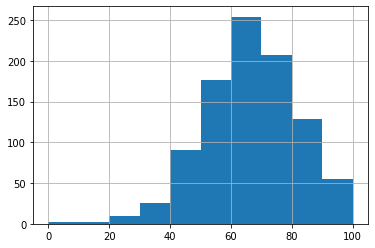

In [29]:
stu_df['math score'].hist()

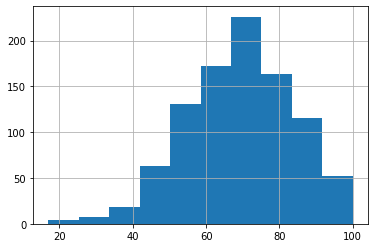

In [30]:
stu_df['reading score'].hist()

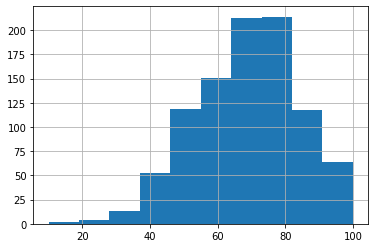

In [31]:
stu_df['writing score'].hist()

In [32]:
# Según los histogramas anteriores la distribución de los 3 puntajes (matemáticas, escritura, lectura) cuentan con sesgo negativo.

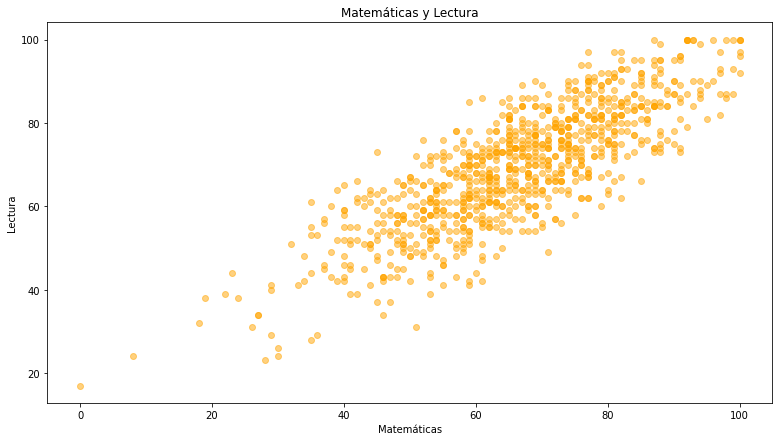

In [37]:
#PUNTO 4 CORRELACIÓN ENTRE LOS PUNTAJES OBTENIDOS EN ALS 3 MATERIAS

#Determinamos la posible correlación con gráficos bivariados de Scatter Plot

plt.figure(figsize = (13, 7))
plt.scatter(stu_df['math score'], stu_df['reading score'], alpha = 0.5, color = 'orange')
plt.title('Matemáticas y Lectura')
plt.xlabel('Matemáticas')
plt.ylabel('Lectura')
plt.show()

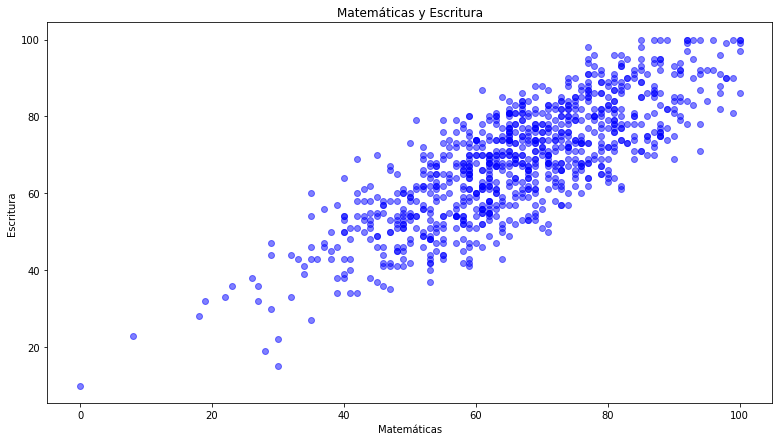

In [38]:
plt.figure(figsize = (13, 7))
plt.scatter(stu_df['math score'], stu_df['writing score'], alpha = 0.5, color = 'blue')
plt.title('Matemáticas y Escritura')
plt.xlabel('Matemáticas')
plt.ylabel('Escritura')
plt.show()

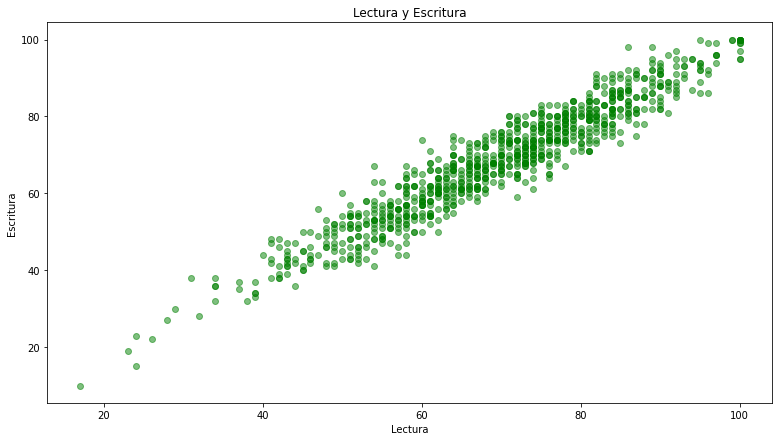

In [39]:
plt.figure(figsize = (13, 7))
plt.scatter(stu_df['reading score'], stu_df['writing score'], alpha = 0.5, color = 'green')
plt.title('Lectura y Escritura')
plt.xlabel('Lectura')
plt.ylabel('Escritura')
plt.show()

In [ ]:
#Los gráficos anteriores permiten intuir una correlación positiva entre los puntajes. Verificamos con el cálculo de coeficiente de correlación

In [47]:
stu_df[['math score', 'reading score']].corr()

,math score,reading score
math score,1.00000,0.81888
reading score,0.81888,1.00000


In [48]:
stu_df[['reading score', 'writing score']].corr()

,reading score,writing score
reading score,1.000000,0.955338
writing score,0.955338,1.000000


In [43]:
#Con los resultados anteriores podemos verificar la existencia de una fuerte correlación entre los puntajes


In [44]:
# PUNTO 5 PUNTAJES DE MATEMÁTICAS POR GÉNERO


In [ ]:
#Para determinar lo anterior, realizamos agrupación por género para matemáticas


{'SECUESTRO EXTORSIVO', 'SECUESTRO SIMPLE'}

In [45]:
stu_df['math score'].groupby(stu_df["gender"]).sum()

gender
female        25637.0
male          24995.0
non-binary     9153.0
Name: math score, dtype: float64

In [46]:
# Con base en lo anterior, el género femenino obtubo mejores resultados en matemáticas. 
# No obstante, no hay una diferencia sustancial con el género masculino

In [49]:
# PUNTO 6 ESCOLARIDAD PADRES DE ESTUDIANTES CON PUNTAJES MAYOR AL PERCENTIL 85 EN ESCRITURA

In [51]:
# PUNTO 7. ESTUDIANTES CON PUNTAJES SUPERIORES A 90 EN TODAS LAS MATERIAS

In [83]:
S90_df = stu_df[(stu_df['math score'] > 90) & (stu_df['reading score']>=90) & (stu_df['writing score']>=90)]
S90_df.shape

(22, 8)

In [84]:
#De acuerdo con lo anterior, solo 22 estudiantes cumplen todos los puntajes por encima de 90 por lo cual el porcentaje del total es de solo el 2,2%
#Realizamos una agrupación apra saber el nivel de escolaridad de los padres de estos estudiantes

In [92]:
S90_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
114,non-binary,group E,bachelor's degree,standard,completed,99.0,100.0,100.0
165,female,group C,bachelor's degree,standard,completed,96.0,100.0,100.0
263,female,group E,high school,NaN,none,99.0,93.0,90.0
451,female,group E,some college,standard,none,100.0,92.0,97.0
458,female,group E,bachelor's degree,standard,none,100.0,100.0,100.0


In [94]:
S90_df['parental level of education'].value_counts()

bachelor's degree     11
some college           4
associate's degree     3
master's degree        2
high school            1
some high school       1
Name: parental level of education, dtype: int64

In [95]:
# Según el resultado anterior, la educación más frecuente de estos estudiantes es "Bachelor" seguido de "some college"